In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data
#### importing raw data

In [5]:
data=pd.read_csv('data.csv')

In [8]:
data.shape

(242, 12)

In [10]:
data.columns

Index(['ID', 'NAME', 'FATHER NAME', 'DEPARTMENT', 'WORKHOUR', 'OVERTIME',
       'EXP', 'LEAVES', 'LAST_TRAINING', 'ERROR', 'OUTPUT',
       'PERFORMANCE_RATING'],
      dtype='object')

In [11]:
data.head()

,ID,NAME,FATHER NAME,DEPARTMENT,WORKHOUR,OVERTIME,EXP,LEAVES,LAST_TRAINING,ERROR,OUTPUT,PERFORMANCE_RATING
0,1,GIAN DASS,GANESH,CUTTING /BENDING/PRESS,6,4,4,5,10,1,78,8
1,2,GOVIND,DEVISRAN,CUTTING /BENDING/PRESS,5,4,5,2,17,1,64,7
2,3,PARVIND KUMAR,FEKU PRASAD,CUTTING /BENDING/PRESS,6,2,7,7,10,4,46,4
3,4,DEVENDRA SINGH,KEDAR NATH SINGH,CUTTING /BENDING/PRESS,4,2,7,7,9,0,48,5
4,5,SURENDRA SAV,RAMESHWAR SAV,CUTTING /BENDING/PRESS,7,1,8,7,16,0,54,5


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  242 non-null    int64 
 1   NAME                242 non-null    object
 2   FATHER NAME         241 non-null    object
 3   DEPARTMENT          242 non-null    object
 4   WORKHOUR            242 non-null    int64 
 5   OVERTIME            242 non-null    int64 
 6   EXP                 242 non-null    int64 
 7   LEAVES              242 non-null    int64 
 8   LAST_TRAINING       242 non-null    int64 
 9   ERROR               242 non-null    int64 
 10  OUTPUT              242 non-null    int64 
 11  PERFORMANCE_RATING  242 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 22.8+ KB


## Analysis of department wise performance

In [13]:
dept = data.iloc[:,[3,11]].copy()
dept_per = dept.copy()

In [14]:
print(dept)

                 DEPARTMENT  PERFORMANCE_RATING
0    CUTTING /BENDING/PRESS                   8
1    CUTTING /BENDING/PRESS                   7
2    CUTTING /BENDING/PRESS                   4
3    CUTTING /BENDING/PRESS                   5
4    CUTTING /BENDING/PRESS                   5
..                      ...                 ...
237                   ADMIN                   7
238                   ADMIN                   9
239                   ADMIN                   6
240                   ADMIN                   4
241                   ADMIN                  10

[242 rows x 2 columns]


In [15]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept_per.groupby(by='DEPARTMENT')['PERFORMANCE_RATING'].mean()


DEPARTMENT
ADMIN                     6.932203
CUTTING /BENDING/PRESS    6.931034
PACKING                   7.677419
PAINTING / COATING        7.375000
WELDING  ( MIG & SPOT)    7.590361
Name: PERFORMANCE_RATING, dtype: float64

<AxesSubplot:xlabel='DEPARTMENT', ylabel='PERFORMANCE_RATING'>

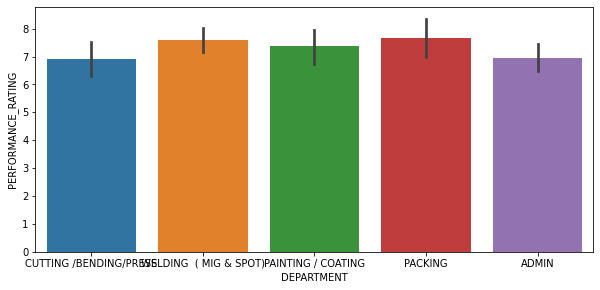

In [16]:
plt.figure(figsize=(10,4.5))
sns.barplot(dept_per['DEPARTMENT'],dept_per['PERFORMANCE_RATING'])


In [17]:
# Analyze each department separately
dept_per.groupby(by='DEPARTMENT')['PERFORMANCE_RATING'].value_counts()


DEPARTMENT              PERFORMANCE_RATING
ADMIN                   8                     13
                        7                     10
                        5                      8
                        9                      8
                        4                      7
                        6                      7
                        10                     5
                        3                      1
CUTTING /BENDING/PRESS  7                      6
                        5                      5
                        6                      5
                        8                      5
                        9                      4
                        4                      2
                        10                     2
PACKING                 9                      7
                        6                      6
                        8                      5
                        7                      4
                        5 

In [19]:
# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept_per['DEPARTMENT'])
performance = pd.DataFrame(dept_per['PERFORMANCE_RATING'])
dept_rating = pd.concat([department,performance],axis=1)


<AxesSubplot:xlabel='PERFORMANCE_RATING', ylabel='ADMIN'>

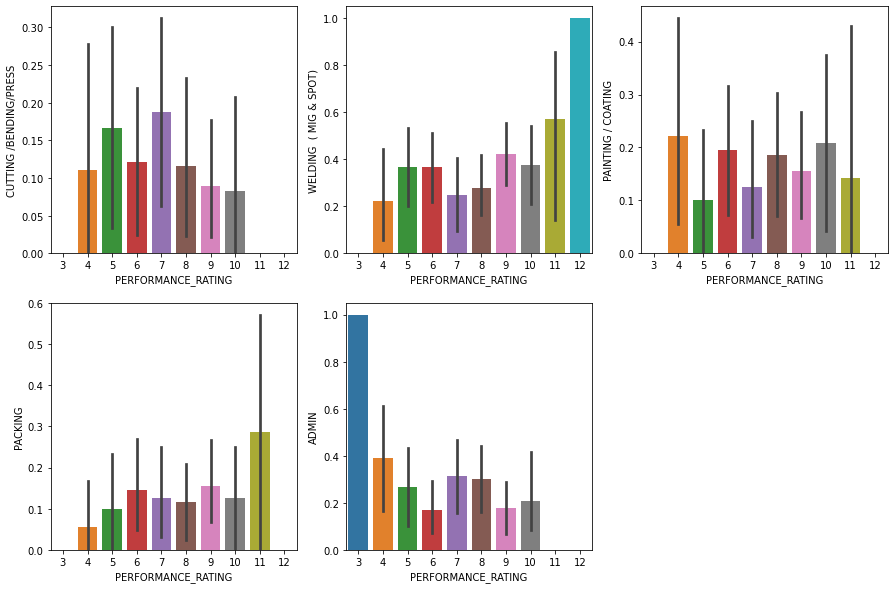

In [20]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(dept_rating['PERFORMANCE_RATING'],dept_rating['CUTTING /BENDING/PRESS'])
plt.subplot(2,3,2)
sns.barplot(dept_rating['PERFORMANCE_RATING'],dept_rating['WELDING  ( MIG & SPOT)'])
plt.subplot(2,3,3)
sns.barplot(dept_rating['PERFORMANCE_RATING'],dept_rating['PAINTING / COATING'])
plt.subplot(2,3,4)
sns.barplot(dept_rating['PERFORMANCE_RATING'],dept_rating['PACKING'])
plt.subplot(2,3,5)
sns.barplot(dept_rating['PERFORMANCE_RATING'],dept_rating['ADMIN'])

### data processing

In [22]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
for i in (3,4,5,6,7,10):
    data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])
data.head()

,ID,NAME,FATHER NAME,DEPARTMENT,WORKHOUR,OVERTIME,EXP,LEAVES,LAST_TRAINING,ERROR,OUTPUT,PERFORMANCE_RATING
0,1,GIAN DASS,GANESH,1,4,4,4,5,10,1,37,8
1,2,GOVIND,DEVISRAN,1,3,4,5,2,17,1,24,7
2,3,PARVIND KUMAR,FEKU PRASAD,1,4,2,7,7,10,4,6,4
3,4,DEVENDRA SINGH,KEDAR NATH SINGH,1,2,2,7,7,9,0,8,5
4,5,SURENDRA SAV,RAMESHWAR SAV,1,5,1,8,7,16,0,14,5


### Feature Selection
We need correlation coefficient as there are quite a few columns

Standardisation and Label Encoding is also used for feature transformation

A separate analysis considering all the predictors was carried out but it resulted in decreasing the accuracy . Similarly , PCA also reduces the accuracy

In [23]:
# Finding out the correlation coeffecient to find out which predictors are significant.
data.corr()

,ID,DEPARTMENT,WORKHOUR,OVERTIME,EXP,LEAVES,LAST_TRAINING,ERROR,OUTPUT,PERFORMANCE_RATING
ID,1.000000,-0.577188,-0.048497,0.023424,-0.072897,-0.047634,0.071122,0.026583,-0.064155,-0.061300
DEPARTMENT,-0.577188,1.000000,0.043459,-0.008815,0.024531,-0.037105,-0.113342,0.084165,0.118631,0.139422
WORKHOUR,-0.048497,0.043459,1.000000,-0.031573,-0.014640,-0.043082,-0.123842,0.100366,-0.107647,0.071949
OVERTIME,0.023424,-0.008815,-0.031573,1.000000,0.073703,-0.015628,0.155282,-0.035068,-0.083927,0.002023
EXP,-0.072897,0.024531,-0.014640,0.073703,1.000000,0.053857,0.022048,-0.012677,0.002438,0.149605
LEAVES,-0.047634,-0.037105,-0.043082,-0.015628,0.053857,1.000000,0.045013,-0.061970,-0.055417,-0.297207
LAST_TRAINING,0.071122,-0.113342,-0.123842,0.155282,0.022048,0.045013,1.000000,-0.038783,-0.052691,-0.242158
ERROR,0.026583,0.084165,0.100366,-0.035068,-0.012677,-0.061970,-0.038783,1.000000,0.067754,0.019792
OUTPUT,-0.064155,0.118631,-0.107647,-0.083927,0.002438,-0.055417,-0.052691,0.067754,1.000000,0.906970
PERFORMANCE_RATING,-0.061300,0.139422,0.071949,0.002023,0.149605,-0.297207,-0.242158,0.019792,0.906970,1.000000


In [24]:
# Dropping the first columns as it is of no use for analysis.
data.drop(['ID'],inplace=True,axis=1)

In [116]:
data.head()

,NAME,FATHER NAME,DEPARTMENT,WORKHOUR,OVERTIME,EXP,LEAVES,LAST_TRAINING,ERROR,OUTPUT,PERFORMANCE_RATING
0,GIAN DASS,GANESH,1,4,4,4,5,10,1,37,8
1,GOVIND,DEVISRAN,1,3,4,5,2,17,1,24,7
2,PARVIND KUMAR,FEKU PRASAD,1,4,2,7,7,10,4,6,4
3,DEVENDRA SINGH,KEDAR NATH SINGH,1,2,2,7,7,9,0,8,5
4,SURENDRA SAV,RAMESHWAR SAV,1,5,1,8,7,16,0,14,5


In [280]:
# Here we have selected only the important columns
y = data.PERFORMANCE_RATING
#X = data.iloc[:,0:-1]  All predictors were selected it resulted in dropping of accuracy.
X = data.iloc[:,[3,4,8,9,10]] # Taking only variables with correlation coeffecient greater than 0.1
X.head(10)

,WORKHOUR,OVERTIME,ERROR,OUTPUT,PERFORMANCE_RATING
0,4,4,1,37,8
1,3,4,1,24,7
2,4,2,4,6,4
3,2,2,0,8,5
4,5,1,0,14,5
5,3,1,0,48,8
6,4,1,4,27,7
7,0,5,1,24,5
8,5,5,1,24,7
9,5,2,3,23,6


In [281]:
# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)


In [282]:
# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [283]:
X_train.shape

(169, 5)

In [284]:
X_test.shape

(73, 5)

### Logistic Regression

In [285]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression()

In [286]:
# Predicting the model
y_predict_log = model_logr.predict(X_test)

In [287]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

0.6027397260273972
              precision    recall  f1-score   support

           4       1.00      0.50      0.67         6
           5       0.64      0.88      0.74         8
           6       0.80      0.86      0.83        14
           7       0.75      0.30      0.43        10
           8       0.44      0.88      0.58         8
           9       0.53      0.71      0.61        14
          10       0.25      0.11      0.15         9
          11       1.00      0.25      0.40         4

    accuracy                           0.60        73
   macro avg       0.68      0.56      0.55        73
weighted avg       0.64      0.60      0.57        73



In [288]:
confusion_matrix(y_test,y_predict_log)

array([[ 3,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  7,  1,  0,  0,  0,  0,  0],
       [ 0,  1, 12,  1,  0,  0,  0,  0],
       [ 0,  0,  2,  3,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  1,  0,  0],
       [ 0,  0,  0,  0,  4, 10,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  1]], dtype=int64)

In [ ]:
### K- Nearest Neighbour 

In [317]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [318]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)


In [319]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))


0.4383561643835616
              precision    recall  f1-score   support

           4       1.00      0.67      0.80         6
           5       0.50      0.75      0.60         8
           6       0.57      0.57      0.57        14
           7       0.50      0.10      0.17        10
           8       0.30      0.88      0.45         8
           9       0.33      0.36      0.34        14
          10       0.33      0.11      0.17         9
          11       0.00      0.00      0.00         4

    accuracy                           0.44        73
   macro avg       0.44      0.43      0.39        73
weighted avg       0.45      0.44      0.40        73



In [320]:
confusion_matrix(y_test,y_predict_knn)


array([[4, 1, 1, 0, 0, 0, 0, 0],
       [0, 6, 2, 0, 0, 0, 0, 0],
       [0, 5, 8, 1, 0, 0, 0, 0],
       [0, 0, 3, 1, 6, 0, 0, 0],
       [0, 0, 0, 0, 7, 1, 0, 0],
       [0, 0, 0, 0, 9, 5, 0, 0],
       [0, 0, 0, 0, 1, 7, 1, 0],
       [0, 0, 0, 0, 0, 2, 2, 0]], dtype=int64)

### support vector machine

In [289]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', C=100, random_state=10).fit(X_train,y_train)


In [290]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [291]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))


0.9452054794520548
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         6
           5       1.00      0.88      0.93         8
           6       0.93      1.00      0.97        14
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00        14
          10       0.75      1.00      0.86         9
          11       1.00      0.25      0.40         4

    accuracy                           0.95        73
   macro avg       0.96      0.89      0.89        73
weighted avg       0.96      0.95      0.94        73



In [292]:
confusion_matrix(y_test,y_predict_svm)

array([[ 6,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  7,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  1]], dtype=int64)

### Decision Tree with grid search CV

In [293]:

# Training the model
from sklearn.tree import DecisionTreeClassifier

classifier_dtg=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_griddtree=GridSearchCV(estimator=classifier_dtg, param_grid=parameters, scoring='accuracy',cv=10)
model_griddtree.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [294]:
model_griddtree.best_params_

{'criterion': 'gini', 'min_samples_split': 2}

In [295]:
# Predicting the model
y_predict_dtree = model_griddtree.predict(X_test)

In [296]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))


1.0
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         4

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



In [297]:
confusion_matrix(y_test,y_predict_dtree)

array([[ 6,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  4]], dtype=int64)

### Random Forest with Grid Search CV

In [299]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [300]:
model_gridrf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4}

In [301]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)


In [302]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))


0.958904109589041
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00        14
          10       0.75      1.00      0.86         9
          11       1.00      0.25      0.40         4

    accuracy                           0.96        73
   macro avg       0.97      0.91      0.91        73
weighted avg       0.97      0.96      0.95        73



In [303]:
confusion_matrix(y_test,y_predict_rf)

array([[ 6,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  1]], dtype=int64)

### ANN( ARTIFICIAL NEURAL NETWORK)

In [312]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [313]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)


In [314]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))


0.9452054794520548
              precision    recall  f1-score   support

           4       1.00      0.83      0.91         6
           5       0.89      1.00      0.94         8
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00        14
          10       0.75      1.00      0.86         9
          11       1.00      0.25      0.40         4

    accuracy                           0.95        73
   macro avg       0.95      0.89      0.89        73
weighted avg       0.96      0.95      0.94        73



In [315]:
confusion_matrix(y_test,y_predict_mlp)

array([[ 5,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  1]], dtype=int64)

In [321]:
# Exporting the trained model
import joblib
joblib.dump(model_gridrf,'data.ml')

['data.ml']